<a href="https://colab.research.google.com/github/NeSma237/Assignment-2-AI-Platforms-/blob/main/Assignment_2_Fashion_MNIST(AI_Platforms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

mnist_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 163kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.00MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.3MB/s]


In [3]:
#build model
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.final = nn.Linear(128, 10)
        self.relu = nn.ReLU()
# Here we are just feeding the data into each layer, and returning the output,
# while defining an instance of this class.
    def forward(self, img): #convert + flatten
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

In [4]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001)
epoch = 9

# Lists to store loss and accuracy for visualization
train_losses = []
train_accuracies = []

for epoch in range(epoch):
    net.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = t.max(output.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

Epoch 1, Loss: 0.5270, Accuracy: 0.8129
Epoch 2, Loss: 0.3709, Accuracy: 0.8649
Epoch 3, Loss: 0.3326, Accuracy: 0.8787
Epoch 4, Loss: 0.3075, Accuracy: 0.8871
Epoch 5, Loss: 0.2900, Accuracy: 0.8928
Epoch 6, Loss: 0.2767, Accuracy: 0.8979
Epoch 7, Loss: 0.2630, Accuracy: 0.9008
Epoch 8, Loss: 0.2508, Accuracy: 0.9063
Epoch 9, Loss: 0.2401, Accuracy: 0.9092


In [5]:
correct = 0
total = 0

with t.no_grad():
    for data in train_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.915


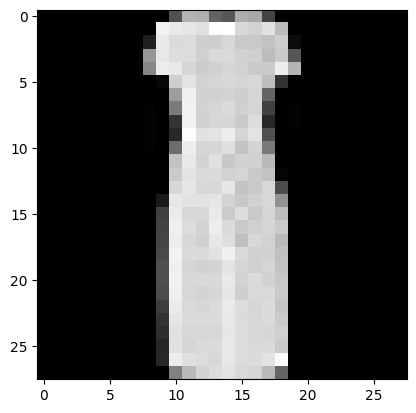

tensor(3)


In [6]:
#visualization
plt.imshow(x[3].view(28, 28),cmap='gray')
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0]))

In [7]:
correct = 0
total = 0

with t.no_grad():
    for data in test_loader:  # Use test_loader for testing
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'Test accuracy: {round(correct/total, 3)}')

Test accuracy: 0.884


In [8]:
all_true_labels = []
all_predicted_labels = []

with t.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        predicted_labels = t.argmax(output, dim=1)

        all_true_labels.extend(y.tolist())
        all_predicted_labels.extend(predicted_labels.tolist())

all_true_labels = t.tensor(all_true_labels)
all_predicted_labels = t.tensor(all_predicted_labels)

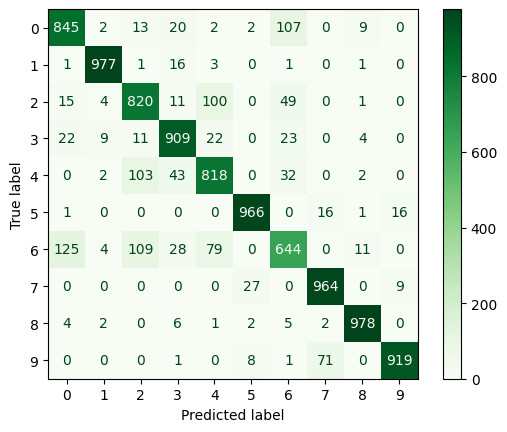

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(all_true_labels, all_predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.show()

## Visualize predictions

### Subtask:
Display a few example images from the test set along with their predicted and true labels, highlighting correct and incorrect predictions.


**Reasoning**:
Iterate through a few batches of the test_loader, display sample images with their true and predicted labels.



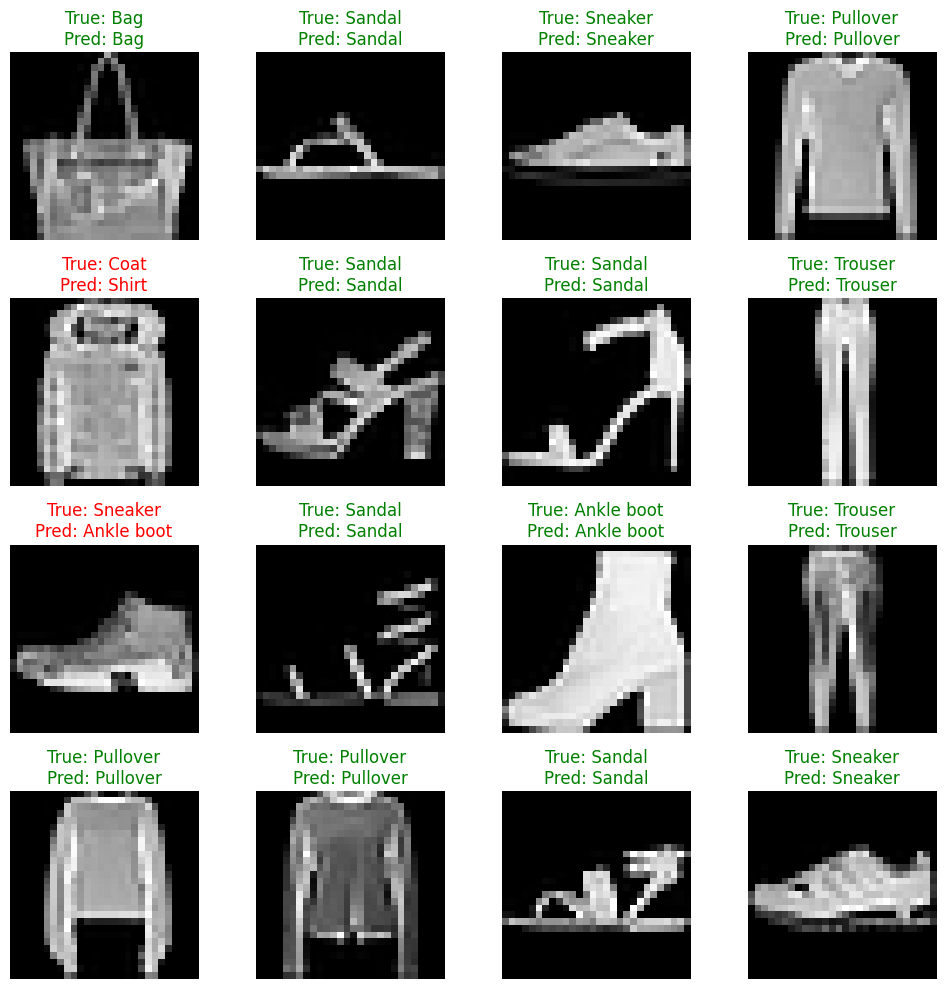

In [10]:
import numpy as np

def get_fashion_mnist_label(label_id):
    labels = {
        0: 'T-shirt/top',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    return labels[label_id]

fig = plt.figure(figsize=(10, 10))
rows = 4
cols = 4
image_count = 0

with t.no_grad():
    for data in test_loader:
        x, y = data
        output = net(x.view(-1, 784))
        predicted_labels = t.argmax(output, dim=1)

        for i in range(len(x)):
            if image_count < rows * cols:
                ax = fig.add_subplot(rows, cols, image_count + 1)
                ax.imshow(x[i].view(28, 28), cmap='gray')
                true_label = get_fashion_mnist_label(y[i].item())
                predicted_label = get_fashion_mnist_label(predicted_labels[i].item())
                title_color = 'green' if true_label == predicted_label else 'red'
                ax.set_title(f'True: {true_label}\nPred: {predicted_label}', color=title_color)
                ax.axis('off')
                image_count += 1
            else:
                break
        if image_count >= rows * cols:
            break

plt.tight_layout()
plt.show()

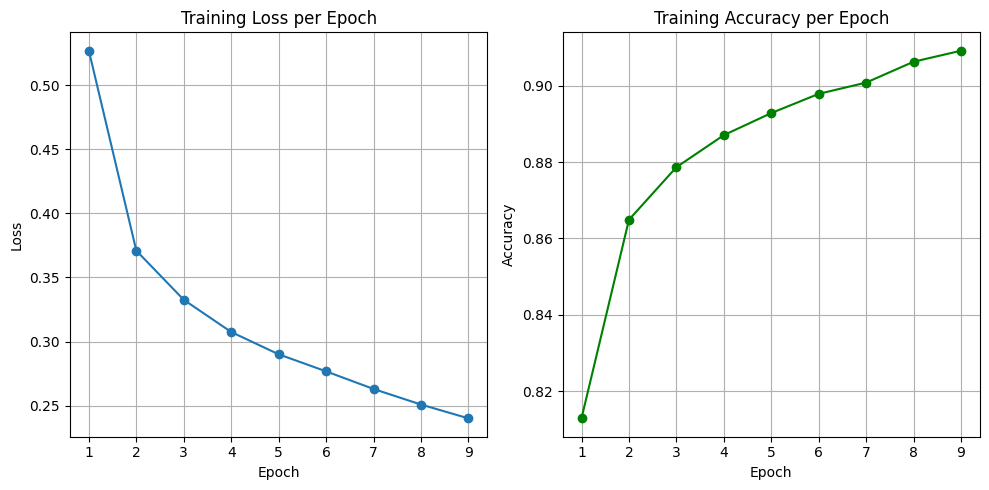

In [11]:
# Visualize loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, marker='o', color='green')
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

## Summary:

### Q&A
- What is the final training accuracy?
The final training accuracy is 0.915.
- What is the final test accuracy?
The final test accuracy is 0.884.

### Data Analysis Key Findings
- The trained neural network achieved a test accuracy of 0.884.
- The confusion matrix provides a visual breakdown of the model's performance across each digit class, showing where the model made correct and incorrect predictions.
- Example images illustrate instances where the model correctly and incorrectly predicted the digit.

### Conclusion
The neural network trained on the Fashion MNIST dataset achieved a test accuracy of approximately 88.4%. The training process showed a consistent decrease in loss and increase in accuracy over 10 epochs, suggesting effective learning. The confusion matrix highlights areas where the model performs well and identifies classes with higher misclassification rates. Overall, the model demonstrates promising performance on this image classification task.
